In [626]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm 
from statsmodels.graphics.mosaicplot import mosaic


# Introduction

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- SEX: Gender (1 = male; 2 = female).
- EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
- AGE: Age (year).
- PAY_0-PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 0 = the repayment status in September, 2005; 2 = the repayment status in August, 2005; . . .;6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). 1 = amount of bill statement in September, 2005; 2 = amount of bill statement in August, 2005; . . .; 6 = amount of bill statement in April, 2005. 
- PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). 1 = amount paid in September, 2005; 2 = amount paid in August, 2005; . . .;6 = amount paid in April, 2005.

In [627]:
df = pd.read_csv('Datasets/Credit.csv')

df.rename(columns={df.columns[-1]: 'default_status'}, inplace=True)

display(df)
df.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


(30000, 25)

In [628]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data cleaning preparation

In order to get a cleaner read on the effects of the explanatory variables, the following modifications were applied:

### Consolidation of bill amounts and pay amounts

The original dataset contained one separate column for each pay and bill amount, starting at the most recent and spanning 6 months of history. In an attempt to quantify the effect of payment amounts and bill amounts as unitary variables, a weighted average was calculated for each subject, using a linear decay factor (highest weight for most recent).

In [629]:
# Define the columns
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Method 1: Linear decay weights (most recent gets highest weight)
# Weights: [6, 5, 4, 3, 2, 1] for [AMT1, AMT2, AMT3, AMT4, AMT5, AMT6]
linear_weights = np.array([6, 5, 4, 3, 2, 1])
linear_weights = linear_weights / linear_weights.sum()  # Normalize to sum to 1

print("Linear weights:", linear_weights)

# Calculate weighted averages
df['WEIGHTED_BILL_AMT'] = np.average(df[bill_columns], weights=linear_weights, axis=1)
df['WEIGHTED_PAY_AMT'] = np.average(df[pay_columns], weights=linear_weights, axis=1)

df.head()


Linear weights: [0.28571429 0.23809524 0.19047619 0.14285714 0.0952381  0.04761905]


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status,WEIGHTED_BILL_AMT,WEIGHTED_PAY_AMT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1987.809524,164.047619
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,2639.619048,666.666667
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,18487.761905,1457.523810
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,42508.380952,1587.285714
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,16363.571429,12593.428571


### Segmentification of certain continuous variables into contiguous segments

The effect of certain continuous variables being hard to interpret because of the small size of the granularity, the following variables were consolidated into a reduced number of contiguous blocks:
- AGE
- LIMIT_BAL
- WEIGHTED_BILL_AMT
- WEIGHTED_PAY_AMT

The boundaries between the blocks were made to match the quartiles for each series.

In [630]:
import pandas as pd
import numpy as np

def create_numeric_percentile_bins(df, column_name, num_bins=4):
    """
    Create percentile bins with ascending numeric codes (1, 2, 3, 4)
    """
    # Create percentile bins and assign numeric labels
    binned_column = pd.qcut(df[column_name], q=num_bins, labels=range(1, num_bins + 1), duplicates='drop')
    
    # Get the actual bin edges for reference
    _, bin_edges = pd.qcut(df[column_name], q=num_bins, retbins=True, duplicates='drop')
    
    return binned_column.astype(int), bin_edges

# Apply numeric percentile binning
variables_to_bin = ['AGE', 'LIMIT_BAL', 'WEIGHTED_BILL_AMT', 'WEIGHTED_PAY_AMT']

print("Creating numeric percentile-based bins (1=lowest quartile, 4=highest quartile)...")
print("=" * 80)

for var in variables_to_bin:
    # Create numeric bins
    binned_col, edges = create_numeric_percentile_bins(df, var, num_bins=4)
    
    # Add the binned column to dataframe
    df[f'{var}_Q'] = binned_col
    
    # Print bin information
    print(f"\n{var}_Q:")
    print(f"  Overall range: {df[var].min():.2f} to {df[var].max():.2f}")
    print(f"  Quartile boundaries and coding:")
    
    for i in range(len(edges) - 1):
        quartile_num = i + 1
        start_val = edges[i]
        end_val = edges[i + 1]
        count = (df[f'{var}_Q'] == quartile_num).sum()
        percentage = count / len(df) * 100
        
        print(f"    {quartile_num}: {start_val:8.2f} to {end_val:8.2f} | {count:,} obs ({percentage:.1f}%)")
    
    # Show the numeric distribution
    print(f"  Value counts: {dict(df[f'{var}_Q'].value_counts().sort_index())}")

Creating numeric percentile-based bins (1=lowest quartile, 4=highest quartile)...

AGE_Q:
  Overall range: 21.00 to 79.00
  Quartile boundaries and coding:
    1:    21.00 to    28.00 | 8,013 obs (26.7%)
    2:    28.00 to    34.00 | 7,683 obs (25.6%)
    3:    34.00 to    41.00 | 6,854 obs (22.8%)
    4:    41.00 to    79.00 | 7,450 obs (24.8%)
  Value counts: {1: np.int64(8013), 2: np.int64(7683), 3: np.int64(6854), 4: np.int64(7450)}

LIMIT_BAL_Q:
  Overall range: 10000.00 to 1000000.00
  Quartile boundaries and coding:
    1: 10000.00 to 50000.00 | 7,676 obs (25.6%)
    2: 50000.00 to 140000.00 | 7,614 obs (25.4%)
    3: 140000.00 to 240000.00 | 7,643 obs (25.5%)
    4: 240000.00 to 1000000.00 | 7,067 obs (23.6%)
  Value counts: {1: np.int64(7676), 2: np.int64(7614), 3: np.int64(7643), 4: np.int64(7067)}

WEIGHTED_BILL_AMT_Q:
  Overall range: -29464.95 to 873217.38
  Quartile boundaries and coding:
    1: -29464.95 to  4888.90 | 7,500 obs (25.0%)
    2:  4888.90 to 21980.29 | 7,500

In [631]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status,WEIGHTED_BILL_AMT,WEIGHTED_PAY_AMT,AGE_Q,LIMIT_BAL_Q,WEIGHTED_BILL_AMT_Q,WEIGHTED_PAY_AMT_Q
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,1987.809524,164.047619,1,1,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,2639.619048,666.666667,1,2,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,18487.761905,1457.523810,2,2,2,2
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,42508.380952,1587.285714,3,1,3,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,16363.571429,12593.428571,4,1,2,4


### Removal of duplicative variables

The PAY_2 - PAY-6 variables are duplicative of PAY_0, since they measure payment delay in months for multiple months in a row. Since there is not much additional insights to be gained from them beyond what is already included in PAY_0, and to avoid cannibalizing coefficient capital from other more meaningful variables, a decision was made to remove them altogether. 

In [632]:
# remove PAY_2 - PAY_6

df = df.drop(columns=['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

### Replacing -1 with 0 in PAY_0

-1 means 'payed duly'. The next possible value is 1 which indicates '1 month behind'. 

To ensure a consistent step size from baseline for interpreting the odds ratio in logistic regression, we recoded -1 to 0.

In [633]:
df['PAY_0'] = df['PAY_0'].replace(-1, 0)


### Separation between training set and testing set


In order to evaluate the effectiveness of the logistic regression, we subdivided the data into two parts:
- a training sample containing 70% of samples from the original dataset selected at random
- a testing sample containing the remaining 30% of the samples

In [634]:
train_df = df.sample(frac=0.7)
test_df = df.drop(train_df.index)

train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status,WEIGHTED_BILL_AMT,WEIGHTED_PAY_AMT,AGE_Q,LIMIT_BAL_Q,WEIGHTED_BILL_AMT_Q,WEIGHTED_PAY_AMT_Q
23110,23111,310000,2,2,2,32,0,325056,327591,322273,...,10185,8290,7500,0,300913.142857,10915.523810,2,4,4,4
904,905,80000,2,2,2,40,2,57364,58637,59863,...,1777,0,2000,0,59840.285714,2263.380952,3,2,3,2
16587,16588,400000,1,1,2,29,0,1123,82556,67823,...,1712,1766,1907,0,50583.000000,24919.714286,2,4,3,4
22863,22864,350000,2,1,2,32,0,87611,87325,90539,...,10000,10000,10000,0,91025.761905,5970.476190,2,4,4,4
16424,16425,200000,2,3,1,50,0,162296,169288,168430,...,3000,3200,6000,0,146289.571429,7176.190476,4,3,4,4


# Exploratory data analysis

## Sex distribution

Proportion of males:  0.39626666666666666
Proportion of females:  0.6037333333333333


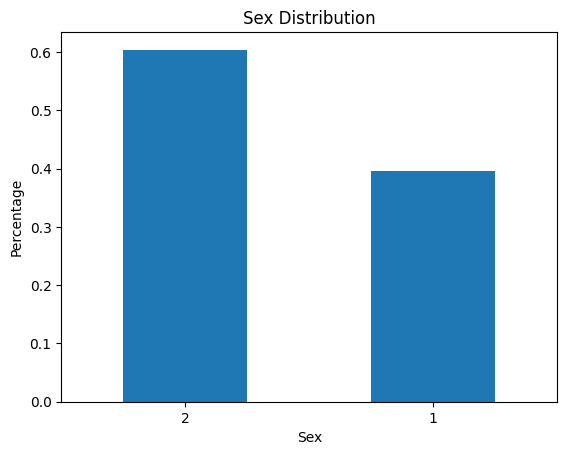

In [635]:
sex = df['SEX']

males = df[sex == 1]
females = df[sex == 2]

proportion_males = len(males) / len(df)
proportion_females = len(females) / len(df)

print("Proportion of males: ", proportion_males)
print("Proportion of females: ", proportion_females)

counted = sex.value_counts(normalize=True)
counted.plot.bar()

plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


## Age distribution

In [636]:
age = df['AGE']
age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

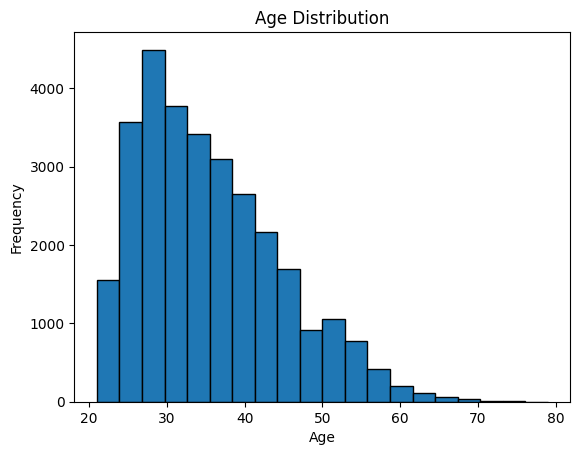

In [637]:
plt.hist(age, bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

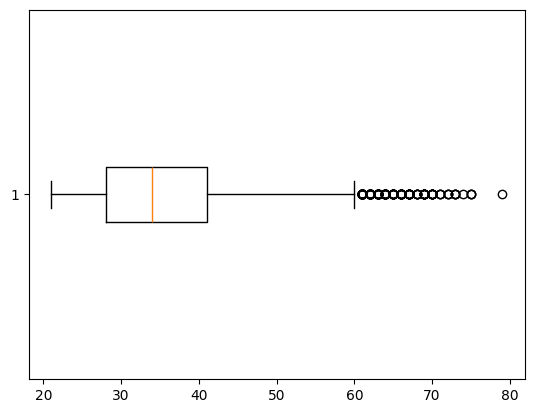

In [638]:
plt.boxplot(age, vert=False)
plt.show()

## Limit balance

In [639]:
limit_balance = df['LIMIT_BAL']
limit_balance.describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

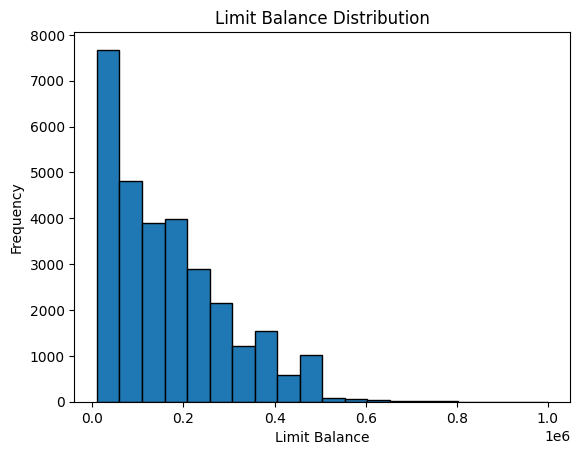

In [640]:
plt.hist(limit_balance, bins=20, edgecolor='black')
plt.title('Limit Balance Distribution')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.show()

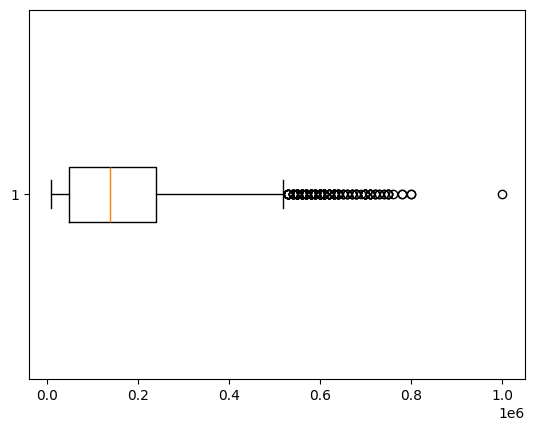

In [641]:
plt.boxplot(limit_balance, vert=False)
plt.show()



## Defaults

In [642]:
# Visualize the default payment next month
default_payment = df['default_status']
default_payment.describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_status, dtype: float64

counted:  default_status
0    0.7788
1    0.2212
Name: proportion, dtype: float64


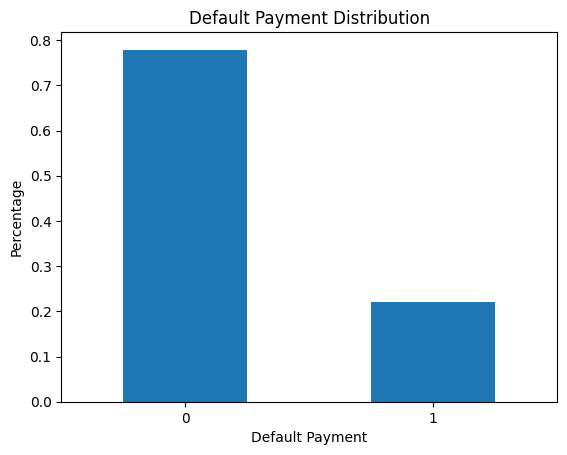

In [643]:
counted = default_payment.value_counts(normalize=True)

print("counted: ", counted)

counted.plot.bar()

plt.title('Default Payment Distribution')
plt.xlabel('Default Payment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

## Correlations

                      statistics      p_values  dof
EDUCATION             162.167785  0.000000e+00    6
LIMIT_BAL_Q           819.016214  0.000000e+00    3
PAY_0                5328.488635  0.000000e+00    9
WEIGHTED_PAY_AMT_Q    891.338988  0.000000e+00    3
AGE_Q                  60.569113  4.443113e-13    3
SEX                    47.905433  4.472755e-12    1
MARRIAGE               35.662396  8.825862e-08    3
WEIGHTED_BILL_AMT_Q    22.177517  5.991184e-05    3


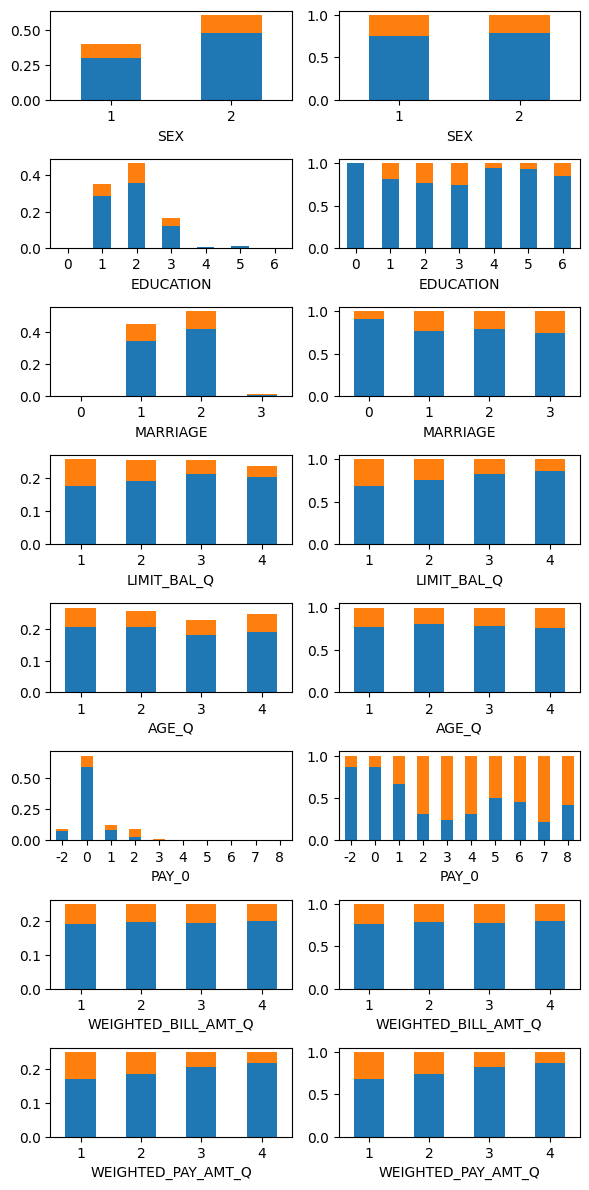

In [644]:
from matplotlib import gridspec

def drawBarCharts(df, keys):

    gs = gridspec.GridSpec(len(keys), 2)
    fig = plt.figure(figsize=(6,12))
    
    statistics = []
    p_values = []
    dof = []

    for i, key in enumerate(keys):

        ax = fig.add_subplot(gs[i, 0])      
         
        normalized_table = pd.crosstab(df[key], df['default_status'], margins = False, normalize=True)
        normalized_table.plot(kind='bar', stacked=True, ax=ax, 
                    xlabel=key, 
                    legend=False)
        ax.tick_params(axis='x', labelrotation=0)

        ax = fig.add_subplot(gs[i, 1])      

        raw_table = pd.crosstab(df[key], df['default_status'], margins = False)
        contingency_pct = raw_table.div(raw_table.sum(axis=1), axis=0)
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, 
                    xlabel=key,
                    legend=False)
        ax.tick_params(axis='x', labelrotation=0)

        sm_table = sm.stats.Table(raw_table)  # ← FIX: Use raw_table, not normalized
        X2 = sm_table.test_nominal_association() 

        # print("X2: ", X2)

        statistics.append(X2.statistic)
        p_values.append(X2.pvalue)
        dof.append(X2.df)
        

    fig.tight_layout()


    dataframe = pd.DataFrame({'statistics': statistics, 'p_values': p_values, 'dof': dof}, index=keys)

    # sort ascending by p_values
    dataframe = dataframe.sort_values(by='p_values', ascending=True)

    return dataframe

keys = ['SEX', 'EDUCATION', 'MARRIAGE', 'LIMIT_BAL_Q', 'AGE_Q', 'PAY_0', 'WEIGHTED_BILL_AMT_Q', 'WEIGHTED_PAY_AMT_Q']
dataframe = drawBarCharts(df, keys)

print(dataframe)

plt.show()
    

# Model selection

Statistical models are a method for predicting the value of a response variable based on multiple explanatory variables. These models identify the effects of each explanatory variable adjusting for the others, resulting in a prediction equation which can be written as:

$$E(Y_{i})=\beta_{0}+\beta_{1}x_{i1}+...+\beta_{p}x_{ip}$$ 

where: 
- $x_{ij}$ is the value of explanatory variable $j$ for subject $i$
- $p$ is the count of explanatory variables

Linear models assume a normal distribution and constant variance in the response variable at each combination of explanatory variables. 

In the case of predicting credit defaults, the response variable is a Bernouilli variable and the standard linear regression model is inadequate because:
- the normality assumption is violated because the distribution is binomial
- the constant variance assumption is also violated because its variance depends on its mean ($\mu(1 - \mu)$)
- the predicted values are not constrained to [0, 1]

In this case we turn to GLMs (Generalized Linear Models), which are a family of models which extend the linear regression dynamics to fit data which badly violate the assumptions of the normal linear model.

GLMs are characterized by three components:
- the random component (the response variable)
- the systematic component (the explanatory variable)
- the link function (a transformation function which allows the predicted value to be non-linearly related to the explanatory variables)

For Bernouilli variables such as the credit default variable, we need to model the probability that the outcomes falls in one of two categories: success or failure. This makes this problem a classification problem and one for which the logistic regression model is particularly well suited.

The link function of logistic regression models is called **the logit** and can be expressed as:

$$\log{(\frac{\mu_{i}}{1-\mu_{i}})}$$

Therefore the full prediction equation is:

$$\log{(\frac{\mu_{i}}{1-\mu_{i}})}=\beta_{0}+\beta_{1}x_{i1}+...+\beta_{p}x_{ip}$$

The results produced by the logistic regression model would need to be converted back to a probability of default $\pi$ by reversing the effects of the logit function:

$$\pi_{i}=\frac{1}{1+e^{-(\beta_{0}+\beta_{1}x_{i1}+...+\beta_{p}x_{ip})}}$$

Another way to read the model is to characterize the change in $Y$ based on a one unit increment of a given explanatory variable, this is done by looking at the individual coefficients themselves ($\beta_{1}, ..., \beta_{p}$).

In a logistic regression model, the coefficient give you the logg-odds of changes for a particular explanatory variable, adjusting for the others. Reversing the transformation gives you the corresponding odds ratio, answering the question "by how much do the odds of default change when that explanatory variable changes?"

$$odds\ ratio_{i}=e^{\beta_{i}}$$





# Results


In [645]:
import statsmodels.formula.api as smf
import statsmodels.api as sm 

model = smf.glm('default_status ~ LIMIT_BAL_Q + SEX + EDUCATION + MARRIAGE + AGE_Q + PAY_0 + WEIGHTED_BILL_AMT_Q + WEIGHTED_PAY_AMT_Q', data=train_df, family=sm.families.Binomial())

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         default_status   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9618.5
Date:                Thu, 19 Jun 2025   Deviance:                       19237.
Time:                        17:02:59   Pearson chi2:                 2.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1307
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2017      0.135     -1.499      0.134      -0.465       0.062
LIMIT_BAL_Q            -0.1706      0.019     -8.981      0.000      -0.208      -0.133
SEX                    -0.1046      0.037     -2.830      0.005      -0.177      -0.032
EDUCATION              -0.0731      0.025     -2.937      0.003      -0.122      -0.024
MARRIAGE               -0.1297      0.039     -3.330      0.001      -0.206      -0.053
AGE_Q                   0.0416      0.018      2.324      0.020       0.007       0.077
PAY_0                   0.8338      0.021     39.733      0.000       0.793       0.875
WEIGHTED_BILL_AMT_Q    -0.0005      0.021     -0.027      0.979      -0.041       0.040
WEIGHTED_PAY_AMT_Q     -0.2371      0.022    -10.564      0.000      -0.281      -0.193
=======================================================================================
"""

The model gives us the estimated effect for each explanatory variable, along with a set of metrics which indicate the statistical significance of the effect and their confidence levels.

These metrics are:
- the standard error
- the z-score
- the p-value
- the confidence interval

The standard error measures the sampling distribution's normalized deviation around the true proportion of defaults if the effect for that variable was 0 (adjusting for the effect of all other variables), a phenomenon denoted as:

$$H_{0}: \beta_{i}=0$$

and the z-score gives us the amount of standard errors away from where it would be under $H_{0}$. The larger the z-score, the less likely it is due to normal sampling variations.

The p-value gives us the probability of arriving to an effect of that magnitude if the true effect was 0 (adjusting for the effects of all the other variables). In this study, we use alpha = 0.05 therefore all p-values below 0.05 indicate that the effect is statistically significant.




In [646]:
summary_df = pd.concat([results.params, results.pvalues], axis=1, keys=['coef', 'pvalue'])

# absolute value of the coefficients for sorting
summary_df = summary_df.assign(abs_coef=summary_df['coef'].abs())

# get labels of variables with p > 0.05
removed_labels = summary_df.index[summary_df['pvalue'] > 0.05].tolist()

# keep only variables with p <= 0.05
summary_df = summary_df[summary_df['pvalue'] <= 0.05]

# sort by effect size
summary_df = summary_df.sort_values(by='abs_coef', ascending=False)

# rounding 
summary_df['pvalue'] = summary_df['pvalue'].map('{:.5f}'.format)

# print labels of variables with p > 0.05
print("p > 0.05: \n\n{}".format(removed_labels))

print("\n--------------------------------\n")

print("Sorted by effect size: \n{}".format(summary_df))
print("\n--------------------------------\n")



p > 0.05: 

['Intercept', 'WEIGHTED_BILL_AMT_Q']

--------------------------------

Sorted by effect size: 
                        coef   pvalue  abs_coef
PAY_0               0.833813  0.00000  0.833813
WEIGHTED_PAY_AMT_Q -0.237083  0.00000  0.237083
LIMIT_BAL_Q        -0.170636  0.00000  0.170636
MARRIAGE           -0.129659  0.00087  0.129659
SEX                -0.104600  0.00465  0.104600
EDUCATION          -0.073082  0.00331  0.073082
AGE_Q               0.041614  0.02015  0.041614

--------------------------------



In [647]:
# sort by pvalue
summary_df = summary_df.sort_values(by='pvalue', ascending=True)

print("\n--------------------------------\n")

print("Sorted by p-value: \n{}".format(summary_df))
print("\n--------------------------------\n")


--------------------------------

Sorted by p-value: 
                        coef   pvalue  abs_coef
PAY_0               0.833813  0.00000  0.833813
WEIGHTED_PAY_AMT_Q -0.237083  0.00000  0.237083
LIMIT_BAL_Q        -0.170636  0.00000  0.170636
MARRIAGE           -0.129659  0.00087  0.129659
EDUCATION          -0.073082  0.00331  0.073082
SEX                -0.104600  0.00465  0.104600
AGE_Q               0.041614  0.02015  0.041614

--------------------------------



In [648]:
odds_ratios = pd.Series(
    data=round(np.exp(summary_df['coef']), 2),
    index=summary_df.index,
    name='odds_ratio'
)

print(odds_ratios)

PAY_0                 2.30
WEIGHTED_PAY_AMT_Q    0.79
LIMIT_BAL_Q           0.84
MARRIAGE              0.88
EDUCATION             0.93
SEX                   0.90
AGE_Q                 1.04
Name: odds_ratio, dtype: float64


## Interpretation

We first looked at p-values to determine whether the coefficients for each variable were statistically significant. Based on $\alpha=0.05$ we found that of all the proposed explanatory variables, only WEIGHTED_BILL_AMT_Q was not statistically significant (p-value = 0.990).

Among the remaining variables, we observed the following effects, ranked by strength:

### PAY_0 

PAY_0 has the strongest effect on credit default likelihood: for each additional month that a client is late, the odds of defaulting **increase by 133%**.


### WEIGHTED_PAY_AMT_Q

The average payment amount, weighted and split into quartiles, has the second strongest effect. For each increase by one quartile in the adjusted amount paid, the odds of defaulting **decrease by 23%**.

This indicates that people who pay small amounts (like the minimum amount) are more likely to default than people who make bigger payments.

### MARRIAGE

Marriage has the third strongest effect. The odds of defaulting **decrease by 14%** when the client is married compared to being single.

### LIMIT_BAL_Q

Credit limits have the fourth strongest effect. For each quartile-over-quartile increase in credit limits, the odds of defaulting **decrease by 13%**.

This indicates that people with small credit limits are more likely to default than people who have higher credit limits.

### SEX

Gender has the fifth strongest effect, with the odds of defaulting **decreasing by 11%** when the client is female.

### EDUCATION

Education has the sixth strongest effect, with odds of defaulting **decreasing by 6%** with each increment.

This means that people with more education are less likely to default (since the baseline is college education).

### AGE_Q

Age has the weakest effect on credit defaults, with each quartile-over-quartile increment **increasing the risk of default by 4%**. 


### Predicting credit default based on client profile


We created 4 fictitious clients with different characteristics to estimate their likelihood of defaulting using the prediction formula from the model:

Jake is a recent graduate who likes surfing. He has the following profile:
- age: 1  
- sex: 1  
- education: 0  
- marriage: 0  
- limit_balance: 1  
- bill_amount: 2  
- payment_amount: 0  
- payment_history: 0  
  
His likelihood of defaulting is 39.87%.

John is a gambling addict who maxed out all his cards. He has the following profile:
- age: 1  
- sex: 1  
- education: 4  
- marriage: 3  
- limit_balance: 1  
- bill_amount: 4  
- payment_amount: 0  
- payment_history: 8 

His likelihood of defaulting is 99.66%.

Penelope is a wealthy retiree with pristine financial discipline. She has the following profile:
- age: 4  
- sex: 2  
- education: 1  
- marriage: 1  
- limit_balance: 4  
- bill_amount: 1  
- payment_amount: 3  
- payment_history: 0  

Her likelihood of defaulting is 13.98%.

Ricardo is a trust fund kid who never learned responsibility. He has the following profile:
- age: 1  
- sex: 1  
- education: 1  
- marriage: 0  
- limit_balance: 4  
- bill_amount: 4  
- payment_amount: 1  
- payment_history: 6  

His likelihood of defaulting is 98.07%.

Stella is a struggling single mother working three jobs. She has the following profile:
- age: 2  
- sex: 2  
- education: 3  
- marriage: 2  
- limit_balance: 1  
- bill_amount: 1  
- payment_amount: 1  
- payment_history: 0 

Her likelihood of defaulting is 22.67%. 


In [649]:
class Person:

    def __init__(self, age, sex, education, marriage, limit_balance, bill_amount, payment_amount, payment_history):
        self.age = age
        self.sex = sex
        self.education = education
        self.marriage = marriage
        self.limit_balance = limit_balance
        self.bill_amount = bill_amount
        self.payment_amount = payment_amount
        self.payment_history = payment_history

    def calculate_probability(self):
        intercept = results.params['Intercept']
        age_coef = results.params['AGE_Q']
        sex_coef = results.params['SEX']
        education_coef = results.params['EDUCATION']
        marriage_coef = results.params['MARRIAGE']
        limit_balance_coef = results.params['LIMIT_BAL_Q']
        bill_amount_coef = results.params['WEIGHTED_BILL_AMT_Q']
        payment_amount_coef = results.params['WEIGHTED_PAY_AMT_Q']
        payment_history_coef = results.params['PAY_0']

        probability = 1 / (1 + np.exp(-(intercept + age_coef * self.age + sex_coef * self.sex + education_coef * self.education + marriage_coef * self.marriage + limit_balance_coef * self.limit_balance + bill_amount_coef * self.bill_amount + payment_amount_coef * self.payment_amount + payment_history_coef * self.payment_history)))

        return probability
    


jake = Person(age=1, sex=1, education=0, marriage=0, limit_balance=1, bill_amount=2, payment_amount=0, payment_history=0)
print("jake:", round(jake.calculate_probability(), 4))

john = Person(age=1, sex=1, education=4, marriage=3, limit_balance=1, bill_amount=4, payment_amount=0, payment_history=8)
print("john:", round(john.calculate_probability(), 4))

penelope = Person(age=4, sex=2, education=1, marriage=1, limit_balance=4, bill_amount=1, payment_amount=3, payment_history=0)
print("penelope:", round(penelope.calculate_probability(), 4))

ricardo = Person(age=1, sex=1, education=1, marriage=0, limit_balance=4, bill_amount=4, payment_amount=1, payment_history=6)
print("ricardo:", round(ricardo.calculate_probability(), 4))

stella = Person(age=2, sex=2, education=3, marriage=2, limit_balance=1, bill_amount=1, payment_amount=1, payment_history=0)
print("stella:", round(stella.calculate_probability(), 4))
        

jake: 0.3926
john: 0.9961
penelope: 0.1369
ricardo: 0.9769
stella: 0.2289


## Model validation

Performing credit default classification on the 30% of samples set aside for testing allowed us to assess the performance of the model on previously unseen data.

### Accuracy

80.89% of the model's predictions were correct.

### Sensitivity (recall)

The percentage of actual defaulters that were correctly identified by the model (true positive rate) is 24.5%.

### Specificity

The percentage of non-defaulters that were correctly identified by the model (true negative rate) is 97%.

### Positive Predictive Value

The probability that a client actually defaulted given that the model predicted a default (precision) is 69.7%.

### ROC Curve and AUC

We plotted the ROC (Receiver Operating Characteristic) curve to visualize the model's performance across all classification thresholds. The AUC (Area Under the Curve) was 0.75, which indicates fair discriminatory ability.


Test set size: 9000
Number of actual defaults in test set: 1997
Number of predicted defaults: 703
Confusion Matrix:
[[6790  213]
 [1507  490]]

Breakdown:
True Negatives (TN): 6790
False Positives (FP): 213
False Negatives (FN): 1507
True Positives (TP): 490
=== MODEL PERFORMANCE METRICS ===
Accuracy: 0.8089 (80.89%)
Precision: 0.6970 (69.70%)
Sensitivity (Recall): 0.2454 (24.54%)
Specificity: 0.9696 (96.96%)
F1-Score: 0.3630

=== METRIC INTERPRETATIONS ===
• Accuracy: 80.9% of all predictions were correct
• Precision: 69.7% of predicted defaults were actually defaults
• Sensitivity: 24.5% of actual defaults were correctly identified
• Specificity: 97.0% of actual non-defaults were correctly identified
• F1-Score: Harmonic mean of precision and recall = 0.363
AUC-ROC Score: 0.7387


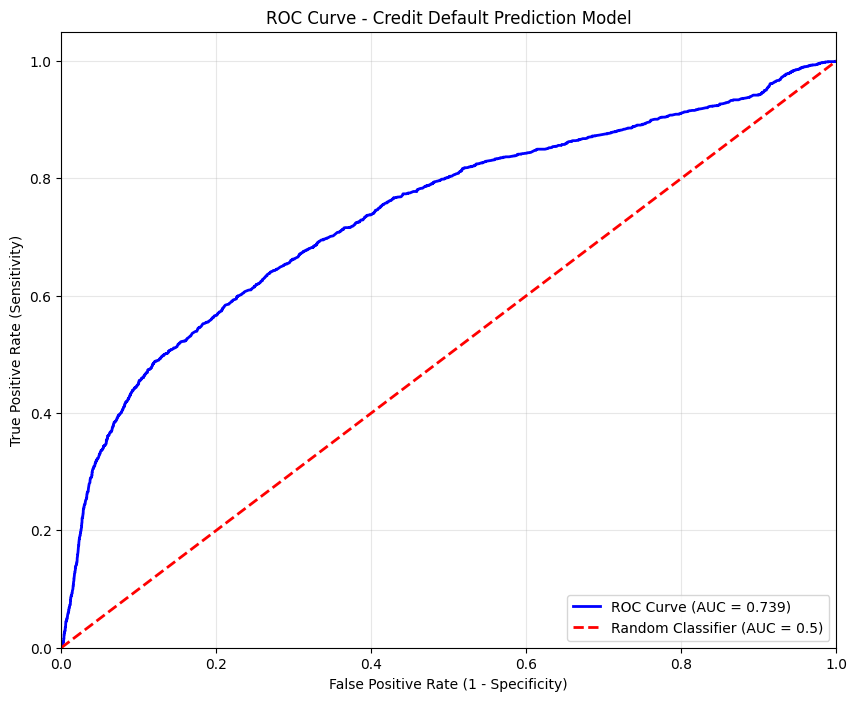


=== AUC INTERPRETATION ===
AUC = 0.739 indicates Fair discriminatory ability


In [662]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


# Generate predictions on test set
# Get predicted probabilities
test_probabilities = results.predict(test_df)

# Convert probabilities to binary predictions using 0.5 threshold
test_predictions = (test_probabilities > 0.5).astype(int)

# Get actual values
test_actual = test_df['default_status'].values

print(f"Test set size: {len(test_df)}")
print(f"Number of actual defaults in test set: {sum(test_actual)}")
print(f"Number of predicted defaults: {sum(test_predictions)}")


# Calculate confusion matrix
cm = confusion_matrix(test_actual, test_predictions)
print("Confusion Matrix:")
print(cm)

# Extract components
tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Calculate all performance metrics
accuracy = accuracy_score(test_actual, test_predictions)
precision = precision_score(test_actual, test_predictions)
sensitivity_recall = recall_score(test_actual, test_predictions)  # Same as sensitivity
f1 = f1_score(test_actual, test_predictions)

# Calculate specificity manually (no direct sklearn function)
specificity = tn / (tn + fp)

print("=== MODEL PERFORMANCE METRICS ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Sensitivity (Recall): {sensitivity_recall:.4f} ({sensitivity_recall*100:.2f}%)")
print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"F1-Score: {f1:.4f}")

print("\n=== METRIC INTERPRETATIONS ===")
print(f"• Accuracy: {accuracy*100:.1f}% of all predictions were correct")
print(f"• Precision: {precision*100:.1f}% of predicted defaults were actually defaults")
print(f"• Sensitivity: {sensitivity_recall*100:.1f}% of actual defaults were correctly identified")
print(f"• Specificity: {specificity*100:.1f}% of actual non-defaults were correctly identified")
print(f"• F1-Score: Harmonic mean of precision and recall = {f1:.3f}")

# Calculate AUC
auc = roc_auc_score(test_actual, test_probabilities)
print(f"AUC-ROC Score: {auc:.4f}")

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(test_actual, test_probabilities)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve - Credit Default Prediction Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n=== AUC INTERPRETATION ===")
if auc >= 0.9:
    interpretation = "Excellent"
elif auc >= 0.8:
    interpretation = "Good"
elif auc >= 0.7:
    interpretation = "Fair"
elif auc >= 0.6:
    interpretation = "Poor"
else:
    interpretation = "Very Poor"
    
print(f"AUC = {auc:.3f} indicates {interpretation} discriminatory ability")

